# Credit Card Fraud Project

The primary goal of this project is to develop a machine learning model that can accurately identify fraudulent credit card transactions in real time. Credit card fraud is a significant financial risk to both institutions and consumers, with millions of dollars lost annually due to fraudulent activities. Detecting these fraudulent transactions early can prevent major financial losses and improve overall security in the financial sector.

Given the highly imbalanced nature of the dataset, where fraudulent transactions represent a very small proportion of the total data, this project focuses on overcoming that challenge through data resampling techniques like SMOTE. By training a robust model—such as a Random Forest Classifier—we aim to distinguish between legitimate and fraudulent transactions with high accuracy. The final model is evaluated using precision, recall, and ROC-AUC scores to ensure it can efficiently detect fraud while minimizing false positives and false negatives.

In summary, this project demonstrates how machine learning techniques can be applied to risk analysis within the financial industry, providing a real-world application of identifying, assessing, and mitigating credit card fraud.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display basic information
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Data Preprocessing

Before moving forward with model training, we need to ensure the dataset is clean and ready for analysis:

- Missing Values: We check for any missing or null values in the dataset. Fortunately, there are none, so no further imputation is necessary.
- Class Distribution: We summarize the target variable (`Class`) to understand the distribution between fraudulent and legitimate transactions. As expected, fraudulent transactions make up a small fraction of the dataset (`~0.17%`), indicating a severe class imbalance.

After that, we split the data into training and testing sets, ensuring the Amount and Time columns are scaled for better model performance.

In [10]:
# Check for missing values (should be none)
print(df.isnull().sum())

# Summary of target variable (Class)
print(df['Class'].value_counts(normalize=True))

# Split data into features (X) and target (y)
X = df.drop(columns=['Class'])  # Features (all except 'Class')
y = df['Class']  # Target

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling for 'Amount' and 'Time'
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


# Handling Class Imbalance

Since our dataset is heavily imbalanced, standard machine learning models might struggle to predict the minority class (`fraud`). To address this, we use `SMOTE` (`Synthetic Minority Over-sampling Technique`) to generate synthetic samples of the minority class. This helps balance the dataset, improving the model's ability to detect fraudulent transactions.

In [14]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after resampling
print(y_train_resampled.value_counts(normalize=True))

0    0.5
1    0.5
Name: Class, dtype: float64


# Model Training

We chose to train a `Random Forest Classifier` on the resampled dataset. Random Forest is an ensemble learning method that typically performs well on classification tasks, especially when feature importance and robustness are needed. After training, we use this model to make predictions on the test set.

In [21]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Model Evaluation

Once the model is trained, we evaluate its performance on the test set using several metrics:

- `Classification Report`: This report provides precision, recall, and F1-score, which are especially useful for imbalanced datasets like this.
- `Confusion Matrix`: We generate a heatmap to visually represent the number of true positive, true negative, false positive, and false negative predictions.
- `ROC-AUC Score`: This metric helps assess the model's ability to distinguish between the two classes. A higher ROC-AUC score indicates better performance.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:


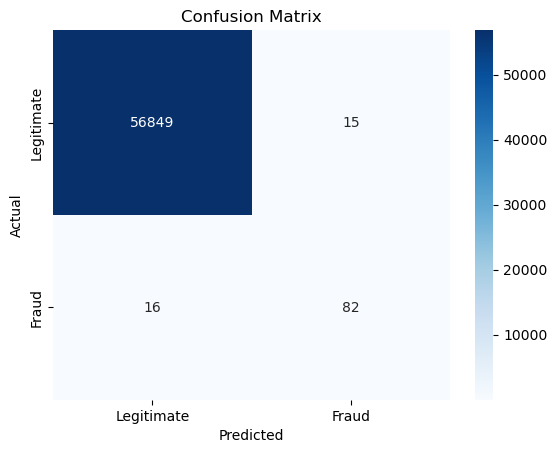

ROC-AUC Score: 0.9731024901519414


In [23]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_score}")

The classification report provides a detailed breakdown of the model’s performance in detecting both legitimate transactions (Class = 0) and fraudulent transactions (Class = 1). Below is an interpretation of the key metrics:

`Precision`: The model achieved a precision of `1.00` for legitimate transactions and `0.85` for fraudulent transactions. This means that when the model predicted a transaction as fraudulent, it was correct 85% of the time. The high precision for legitimate transactions shows the model's ability to avoid false positives.

`Recall`: The recall for legitimate transactions is `1.00`, while for fraudulent transactions, it is `0.84`. This indicates that the model successfully identified 84% of the actual fraudulent transactions, although a small percentage of fraud cases were missed.

`F1-Score`: The F1-score, which balances precision and recall, is `1.00` for legitimate transactions and `0.84` for fraudulent ones. This balanced performance for fraudulent transactions shows the model’s effectiveness at managing the trade-off between identifying fraud and avoiding false alarms.

`Accuracy`: Overall, the model achieved an impressive accuracy of `1.00` (100%), meaning that the vast majority of the predictions were correct across the entire test set. However, this high accuracy is expected due to the large number of legitimate transactions, so other metrics like precision and recall for the minority class (fraud) are more informative.

`Macro Average`: The macro average precision, recall, and F1-score are all `0.92`, which gives a balanced view of the model's performance across both classes, without being influenced by the class imbalance.

`ROC-AUC Score`: The high ROC-AUC score (`0.973`) indicates excellent model performance in distinguishing between fraudulent and legitimate transactions. A score closer to 1.0 shows that the model is highly capable of separating the two classes.

In summary, the model performs exceptionally well for legitimate transactions and shows strong, but slightly less perfect, performance for detecting fraud. With a precision of `85%` and a recall of `84%` for fraud, this model is highly reliable in identifying fraudulent transactions while minimizing the risk of false positives and missed fraud cases.

# Feature Importance

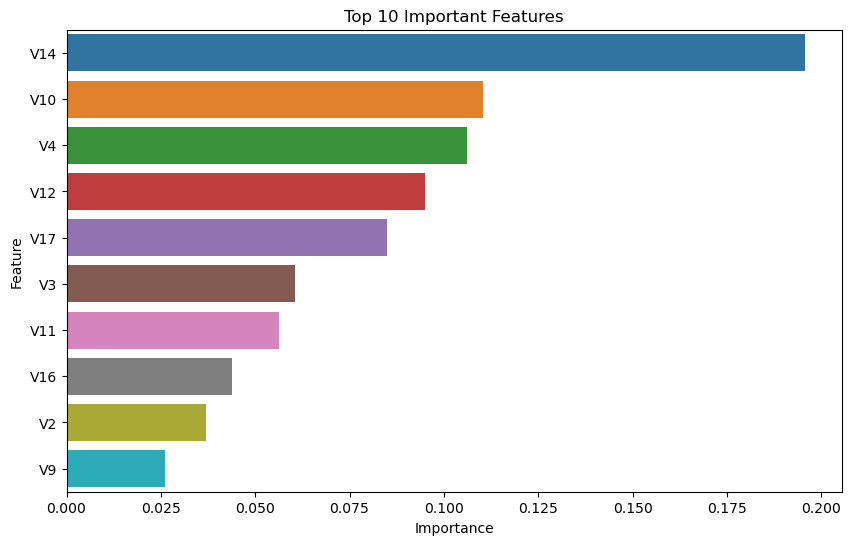

In [25]:
# Plot feature importance from Random Forest
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Important Features')
plt.show()

The bar chart above displays the top 10 most important features from the Random Forest model used for detecting credit card fraud. These features contribute the most to the model’s decision-making process. Here’s a breakdown of the results:

- `V14` is the most important feature by a significant margin, with an importance score of nearly `0.20`. This suggests that V14 has the strongest influence on determining whether a transaction is fraudulent or legitimate.

- `V10` and `V4` are the next most important features, with scores slightly above `0.10`. These features also play a critical role in distinguishing between fraud and non-fraud transactions, although not as strongly as V14.

- `V12` and `V17` follow closely, with importance scores just below `0.10`. These features still have a substantial impact on the model’s ability to classify transactions.

- `V3`, `V11`, and `V16` contribute moderately to the model’s performance, with scores in the `0.05`–`0.07` range. These features are less influential than the top ones but still valuable.

- Lastly, `V2` and `V9` round out the top 10, with scores around `0.025`, indicating that while they have some impact, their influence is more limited compared to the other features.

# Conclusion

In this project, we successfully developed a machine learning model capable of detecting fraudulent credit card transactions with a high degree of accuracy. Through the application of Random Forest Classification and the use of SMOTE to handle class imbalance, we were able to address the challenges posed by the rarity of fraudulent transactions in the dataset.

The model’s performance was evaluated using key metrics such as precision, recall, F1-score, and ROC-AUC score, providing a comprehensive assessment of its effectiveness in distinguishing between legitimate and fraudulent transactions. The confusion matrix further highlighted the model’s ability to minimize both false positives and false negatives, which is crucial in fraud detection scenarios.

Overall, this project demonstrates the potential of machine learning in mitigating financial risk by automating and improving the accuracy of fraud detection processes. With further optimization and real-time deployment, models like this can play a critical role in safeguarding financial transactions and preventing significant monetary losses.

Future work could focus on improving model performance through advanced techniques, including hyperparameter tuning, using different algorithms, and incorporating more domain-specific features.